In [1]:
!where python

C:\Users\daani\Anaconda3\python.exe
C:\Users\daani\AppData\Local\Microsoft\WindowsApps\python.exe


In [33]:
#Standard imports
import os
import sys
sys.path.append('..')

#Third-party imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#Local imports
from src.localpaths import RAW_DATA_PATH, X_TEST_RAW_PATH, Y_TEST_RAW_PATH
from src.data.make_dataset import load_training_data
from src.data.make_dataset import load_test_data

In [4]:
pd.set_option('display.max_columns', 100)

# Load Data

In [6]:
ls ..

 Volume in drive C is OS
 Volume Serial Number is 44B4-9256

 Directory of C:\Users\daani\churn-model

04/02/2020  03:36 PM    <DIR>          .
04/02/2020  03:36 PM    <DIR>          ..
04/02/2020  03:37 PM             1,090 .gitignore
04/02/2020  03:18 PM    <DIR>          data
04/02/2020  02:23 PM    <DIR>          env
04/02/2020  03:19 PM    <DIR>          models
04/04/2020  05:16 PM    <DIR>          notebooks
04/02/2020  01:26 PM                13 README.md
04/04/2020  12:09 PM    <DIR>          src
               2 File(s)          1,103 bytes
               7 Dir(s)  66,084,716,544 bytes free


In [7]:
df = pd.read_csv(RAW_DATA_PATH)

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Descriptive Statistics

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

**TotalCharges needs more research:** It looks like TotalCharges is an object data type even though it should be a float

In [10]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015E322D3C88>,
      dtype=object)

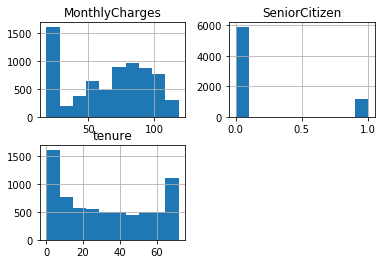

In [13]:
df.hist()

In [14]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [15]:
df.shape

(7043, 21)

In [16]:
(df['Churn'].value_counts()/df.shape[0]).round(2)

No     0.73
Yes    0.27
Name: Churn, dtype: float64

# Load training data

In [24]:
X_train, y_train = load_training_data()

In [25]:
X_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7242-QZLXF,Male,0,No,Yes,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,25.30,25.3
1,8325-QRPZR,Female,0,No,No,7,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,75.15,525
2,7874-ECPQJ,Female,0,No,Yes,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),20.05,85.5
3,2476-YGEFM,Female,0,No,No,29,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),76.00,2215.25
4,2276-YDAVZ,Female,0,No,No,3,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.10,270.7


In [26]:
y_train.head()

,Churn
0,Yes
1,No
2,No
3,No
4,Yes


In [32]:
X_test=pd.read_csv(X_TEST_RAW_PATH)

In [34]:
y_test=pd.read_csv(Y_TEST_RAW_PATH)

In [35]:
X_test.shape

(1761, 20)

In [36]:
y_test.shape

(1761, 1)